# The Python Challenge
<http://www.pythonchallenge.com>

## 0. warming up
<http://www.pythonchallenge.com/pc/def/0.html>
![TV with 2^38 text displayed](images/0.jpg)

In [1]:
2 ** 38  # or pow(2, 38)

274877906944

<http://www.pythonchallenge.com/pc/def/274877906944.html>

## 1. What about making trans?
<http://www.pythonchallenge.com/pc/def/map.html>

![A notepad page with K->M, O->Q, E->Q text](images/1.jpg "everybody thinks twice before 
solving this.")
*everybody thinks twice before solving this.*

> g fmnc wms bgblr rpylqjyrc gr zw fylb. rfyrq ufyr amknsrcpq ypc dmp. bmgle gr gl zw fylb gq glcddgagclr ylb rfyr'q ufw rfgq rcvr gq qm jmle. sqgle qrpgle.kyicrpylq() gq pcamkkclbcb. lmu ynnjw ml rfc spj.



In [2]:
text = ("g fmnc wms bgblr rpylqjyrc gr zw fylb. rfyrq ufyr amknsrcpq ypc dmp. "
        "bmgle gr gl zw fylb gq glcddgagclr ylb rfyr'q ufw rfgq rcvr gq qm jmle. "
        "sqgle qrpgle.kyicrpylq() gq pcamkkclbcb. lmu ynnjw ml rfc spj.")
trans_table = str.maketrans('abcdefghijklmnopqrstuvwxyz',
                            'cdefghijklmnopqrstuvwxyzab')

text.translate(trans_table)

"i hope you didnt translate it by hand. thats what computers are for. doing it in by hand is inefficient and that's why this text is so long. using string.maketrans() is recommended. now apply on the url."

In [3]:
'map'.translate(trans_table)

'ocr'

## 2. ocr
<http://www.pythonchallenge.com/pc/def/ocr.html>

![An open book with small, unreadable text](images/2.jpg "recognize the characters. maybe they are in the book, 
but MAYBE they are in the page source.")
*recognize the characters. maybe they are in the book,  
but MAYBE they are in the page source.*

Page source sample (see [resources/2-source.txt](resources/2-source.txt) for full source text):

    <!--
    find rare characters in the mess below:
    -->

    <!--
    %%$@_$^__#)^)&!_+]!*@&^}@[@%]()%+$&[(_@%+%$*^@$^!+]!&_#)_*}{}}!}_]$[%}@[{_@#_^{*
    @##&{#&{&)*%(]{{([*}@[@&]+!!*{)!}{%+{))])[!^})+)$]#{*+^((@^@}$[**$&^{$!@#$%)!@(&
    +^!{%_$&@^!}$_${)$_#)!({@!)(^}!*^&!$%_&&}&_#&@{)]{+)%*{&*%*&@%$+]!*__(#!*){%&@++
    [skipped other 1217 lines]
    -->
    
Resources:
- <https://stackoverflow.com/questions/12330522/reading-a-file-without-newlines>
- <https://docs.python.org/3/library/collections.html#collections.Counter>

In [4]:
from collections import Counter

with open('resources/2-source.txt') as f:
    text = ''.join(f.read().splitlines())

c = Counter(text)
c.most_common()

[(')', 6186),
 ('@', 6157),
 ('(', 6154),
 (']', 6152),
 ('#', 6115),
 ('_', 6112),
 ('[', 6108),
 ('}', 6105),
 ('%', 6104),
 ('!', 6079),
 ('+', 6066),
 ('$', 6046),
 ('{', 6046),
 ('&', 6043),
 ('*', 6034),
 ('^', 6030),
 ('e', 1),
 ('q', 1),
 ('u', 1),
 ('a', 1),
 ('l', 1),
 ('i', 1),
 ('t', 1),
 ('y', 1)]

## 3. re
<http://www.pythonchallenge.com/pc/def/equality.html>

![3 big candles, then one small floating candle, and then 3 big candles again in row](images/3.jpg)
*One small letter, surrounded by __EXACTLY__ three big bodyguards on each of its sides.*

page source sample (see [resources/3-source.txt](resources/3-source.txt) for full source text):

    <!--
    kAewtloYgcFQaJNhHVGxXDiQmzjfcpYbzxlWrVcqsmUbCunkfxZWDZjUZMiGqhRRiUvGmYmvnJIHEmbT
    MUKLECKdCthezSYBpIElRnZugFAxDRtQPpyeCBgBfaRVvvguRXLvkAdLOeCKxsDUvBBCwdpMMWmuELeG
    ENihrpCLhujoBqPRDPvfzcwadMMMbkmkzCCzoTPfbRlzBqMblmxTxNniNoCufprWXxgHZpldkoLCrHJq
    [skipped other 1247 lines]
    -->

In [5]:
import re

with open('resources/3-source.txt') as f:
    text = ''.join(f.read().splitlines())
    
letter_with_3_bodyguards_re = re.compile(r'[a-z][A-Z]{3}([a-z])[A-Z]{3}[a-z]')

letter_with_3_bodyguards_re.findall(text)

['l', 'i', 'n', 'k', 'e', 'd', 'l', 'i', 's', 't']

<http://www.pythonchallenge.com/pc/def/linkedlist.html>

## 4. follow the chain
http://www.pythonchallenge.com/pc/def/linkedlist.php

![two man logging crosscut tree saw wooden toy](images/4.jpg)

    <!-- urllib may help. DON'T TRY ALL NOTHINGS, since it will never 
    end. 400 times is more than enough. -->

In [6]:
import re
from urllib.request import urlopen

url_template = 'http://www.pythonchallenge.com/pc/def/linkedlist.php?nothing={}'
nothing = '12345'
nothing_re = re.compile(r'next nothing is (\d+)')

for i in range(1, 401):
    with urlopen(url_template.format(nothing)) as response:
       html = response.read().decode('utf-8')
       # print("{:03}. {}".format(i, html))
        
    print('.', sep='', end='')

    match = nothing_re.search(html)
    if match:
        nothing = match.group(1)
    else:
        if 'divide by two' in html.lower():
            nothing = int(nothing) / 2
        else:
            print(html)
            break

...........................................................................................................................................................................................................................................................peak.html


## 5. peak hell
http://www.pythonchallenge.com/pc/def/peak.html

![green round mountain](images/5.jpg)
*pronounce it*

page source:

    <peakhell src="banner.p"/>

    <!-- peak hell sounds familiar ? -->

In [7]:
import pickle

def ascii_printer(data):
    for row in data:
        for char, num in row:
            print(char * num, sep='', end='')
        print()

with open('resources/5-banner.p', 'rb') as f:
    data = pickle.load(f)
    
ascii_printer(data)

                                                                                               
              #####                                                                      ##### 
               ####                                                                       #### 
               ####                                                                       #### 
               ####                                                                       #### 
               ####                                                                       #### 
               ####                                                                       #### 
               ####                                                                       #### 
               ####                                                                       #### 
      ###      ####   ###         ###       #####   ###    #####   ###          ###       #### 
   ###   ##    #### #######     ##  ### 

## 6. now there are pairs
<http://www.pythonchallenge.com/pc/def/channel.html>

![black pants with open zipper](images/6.jpg)

page source:

    <html> <!-- <-- zip -->
    
<http://www.pythonchallenge.com/pc/def/channel.zip>

In [8]:
import zipfile

nothing = '90052'
nothing_re = re.compile(r'next nothing is (\d+)')
comments = []

with zipfile.ZipFile('resources/6-channel.zip', 'r') as zf:
    for _ in range(len(zf.namelist())):
        filename = '{}.txt'.format(nothing)
        text = zf.read(filename).decode('utf-8')
        info = zf.getinfo(filename)
        
        comments.append(info.comment.decode('ascii'))

        match = nothing_re.search(text.lower())
        if match:
            nothing = match.group(1)
        else:
            print(text)
            break

print()
print(''.join(comments))

Collect the comments.

****************************************************************
****************************************************************
**                                                            **
**   OO    OO    XX      YYYY    GG    GG  EEEEEE NN      NN  **
**   OO    OO  XXXXXX   YYYYYY   GG   GG   EEEEEE  NN    NN   **
**   OO    OO XXX  XXX YYY   YY  GG GG     EE       NN  NN    **
**   OOOOOOOO XX    XX YY        GGG       EEEEE     NNNN     **
**   OOOOOOOO XX    XX YY        GGG       EEEEE      NN      **
**   OO    OO XXX  XXX YYY   YY  GG GG     EE         NN      **
**   OO    OO  XXXXXX   YYYYYY   GG   GG   EEEEEE     NN      **
**   OO    OO    XX      YYYY    GG    GG  EEEEEE     NN      **
**                                                            **
****************************************************************
 **************************************************************



## 7. smarty
<http://www.pythonchallenge.com/pc/def/oxygen.html>

![river shore. grayscale line crossing the image](images/7.png)


Resources:
- https://stackoverflow.com/questions/138250/how-can-i-read-the-rgb-value-of-a-given-pixel-in-python

In [9]:
from PIL import Image

im = Image.open('images/7.png')
px = im.load()

x = 8
y = 47

color_values = []
color_values.append(px[0, 47][0])

while x < 608:
    color_values.append(px[x, y][0])
    x += 7

print(''.join(chr(v) for v in color_values))

print(''.join(chr(v) for v in [105, 110, 116, 101, 103, 114, 105, 116, 121]))

smart guy, you made it. the next level is [105, 110, 116, 101, 103, 114, 105, 116, 121]
integrity


## 8. working hard?
http://www.pythonchallenge.com/pc/def/integrity.html

![A fly on a flower](images/8.jpg)
*Where is the missing link?*

Page source:

    <!--
    un: 'BZh91AY&SYA\xaf\x82\r\x00\x00\x01\x01\x80\x02\xc0\x02\x00 \x00!\x9ah3M\x07<]\xc9\x14\xe1BA\x06\xbe\x084'
    pw: 'BZh91AY&SY\x94$|\x0e\x00\x00\x00\x81\x00\x03$ \x00!\x9ah3M\x13<]\xc9\x14\xe1BBP\x91\xf08'
    -->

In [10]:
import bz2

un = b'BZh91AY&SYA\xaf\x82\r\x00\x00\x01\x01\x80\x02\xc0\x02\x00 \x00!\x9ah3M\x07<]\xc9\x14\xe1BA\x06\xbe\x084'
pw = b'BZh91AY&SY\x94$|\x0e\x00\x00\x00\x81\x00\x03$ \x00!\x9ah3M\x13<]\xc9\x14\xe1BBP\x91\xf08'

print(bz2.decompress(un), bz2.decompress(pw))

b'huge' b'file'


## 9. connect the dots
http://www.pythonchallenge.com/pc/return/good.html

![branches of a dry tree. small black points follow its curves](images/9.jpg)

Page source:

    <!--
    first+second=?

    first:
    146,399,163,403,170,393,169,391,166,386,170,381,170,371,170,355,169,346,167,335,170,329,170,320,170,
    310,171,301,173,290,178,289,182,287,188,286,190,286,192,291,194,296,195,305,194,307,191,312,190,316,
    190,321,192,331,193,338,196,341,197,346,199,352,198,360,197,366,197,373,196,380,197,383,196,387,192,
    389,191,392,190,396,189,400,194,401,201,402,208,403,213,402,216,401,219,397,219,393,216,390,215,385,
    215,379,213,373,213,365,212,360,210,353,210,347,212,338,213,329,214,319,215,311,215,306,216,296,218,
    290,221,283,225,282,233,284,238,287,243,290,250,291,255,294,261,293,265,291,271,291,273,289,278,287,
    279,285,281,280,284,278,284,276,287,277,289,283,291,286,294,291,296,295,299,300,301,304,304,320,305,
    327,306,332,307,341,306,349,303,354,301,364,301,371,297,375,292,384,291,386,302,393,324,391,333,387,
    328,375,329,367,329,353,330,341,331,328,336,319,338,310,341,304,341,285,341,278,343,269,344,262,346,
    259,346,251,349,259,349,264,349,273,349,280,349,288,349,295,349,298,354,293,356,286,354,279,352,268,
    352,257,351,249,350,234,351,211,352,197,354,185,353,171,351,154,348,147,342,137,339,132,330,122,327,
    120,314,116,304,117,293,118,284,118,281,122,275,128,265,129,257,131,244,133,239,134,228,136,221,137,
    214,138,209,135,201,132,192,130,184,131,175,129,170,131,159,134,157,134,160,130,170,125,176,114,176,
    102,173,103,172,108,171,111,163,115,156,116,149,117,142,116,136,115,129,115,124,115,120,115,115,117,
    113,120,109,122,102,122,100,121,95,121,89,115,87,110,82,109,84,118,89,123,93,129,100,130,108,132,110,
    133,110,136,107,138,105,140,95,138,86,141,79,149,77,155,81,162,90,165,97,167,99,171,109,171,107,161,
    111,156,113,170,115,185,118,208,117,223,121,239,128,251,133,259,136,266,139,276,143,290,148,310,151,
    332,155,348,156,353,153,366,149,379,147,394,146,399

    second:
    156,141,165,135,169,131,176,130,187,134,191,140,191,146,186,150,179,155,175,157,168,157,163,157,159,
    157,158,164,159,175,159,181,157,191,154,197,153,205,153,210,152,212,147,215,146,218,143,220,132,220,
    125,217,119,209,116,196,115,185,114,172,114,167,112,161,109,165,107,170,99,171,97,167,89,164,81,162,
    77,155,81,148,87,140,96,138,105,141,110,136,111,126,113,129,118,117,128,114,137,115,146,114,155,115,
    158,121,157,128,156,134,157,136,156,136

    -->

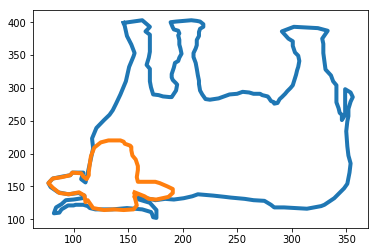

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

first = """
146,399,163,403,170,393,169,391,166,386,170,381,170,371,170,355,169,346,167,335,170,329,170,320,170,
310,171,301,173,290,178,289,182,287,188,286,190,286,192,291,194,296,195,305,194,307,191,312,190,316,
190,321,192,331,193,338,196,341,197,346,199,352,198,360,197,366,197,373,196,380,197,383,196,387,192,
389,191,392,190,396,189,400,194,401,201,402,208,403,213,402,216,401,219,397,219,393,216,390,215,385,
215,379,213,373,213,365,212,360,210,353,210,347,212,338,213,329,214,319,215,311,215,306,216,296,218,
290,221,283,225,282,233,284,238,287,243,290,250,291,255,294,261,293,265,291,271,291,273,289,278,287,
279,285,281,280,284,278,284,276,287,277,289,283,291,286,294,291,296,295,299,300,301,304,304,320,305,
327,306,332,307,341,306,349,303,354,301,364,301,371,297,375,292,384,291,386,302,393,324,391,333,387,
328,375,329,367,329,353,330,341,331,328,336,319,338,310,341,304,341,285,341,278,343,269,344,262,346,
259,346,251,349,259,349,264,349,273,349,280,349,288,349,295,349,298,354,293,356,286,354,279,352,268,
352,257,351,249,350,234,351,211,352,197,354,185,353,171,351,154,348,147,342,137,339,132,330,122,327,
120,314,116,304,117,293,118,284,118,281,122,275,128,265,129,257,131,244,133,239,134,228,136,221,137,
214,138,209,135,201,132,192,130,184,131,175,129,170,131,159,134,157,134,160,130,170,125,176,114,176,
102,173,103,172,108,171,111,163,115,156,116,149,117,142,116,136,115,129,115,124,115,120,115,115,117,
113,120,109,122,102,122,100,121,95,121,89,115,87,110,82,109,84,118,89,123,93,129,100,130,108,132,110,
133,110,136,107,138,105,140,95,138,86,141,79,149,77,155,81,162,90,165,97,167,99,171,109,171,107,161,
111,156,113,170,115,185,118,208,117,223,121,239,128,251,133,259,136,266,139,276,143,290,148,310,151,
332,155,348,156,353,153,366,149,379,147,394,146,399
"""

second = """
156,141,165,135,169,131,176,130,187,134,191,140,191,146,186,150,179,155,175,157,168,157,163,157,159,
157,158,164,159,175,159,181,157,191,154,197,153,205,153,210,152,212,147,215,146,218,143,220,132,220,
125,217,119,209,116,196,115,185,114,172,114,167,112,161,109,165,107,170,99,171,97,167,89,164,81,162,
77,155,81,148,87,140,96,138,105,141,110,136,111,126,113,129,118,117,128,114,137,115,146,114,155,115,
158,121,157,128,156,134,157,136,156,136
"""

first = [int(s.strip()) for s in first.strip().split(',')]
second = [int(s.strip()) for s in second.strip().split(',')]

plt.plot(first[::2], first[1::2], linewidth=4)
plt.plot(second[::2], second[1::2], linewidth=4)
plt.show()